In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

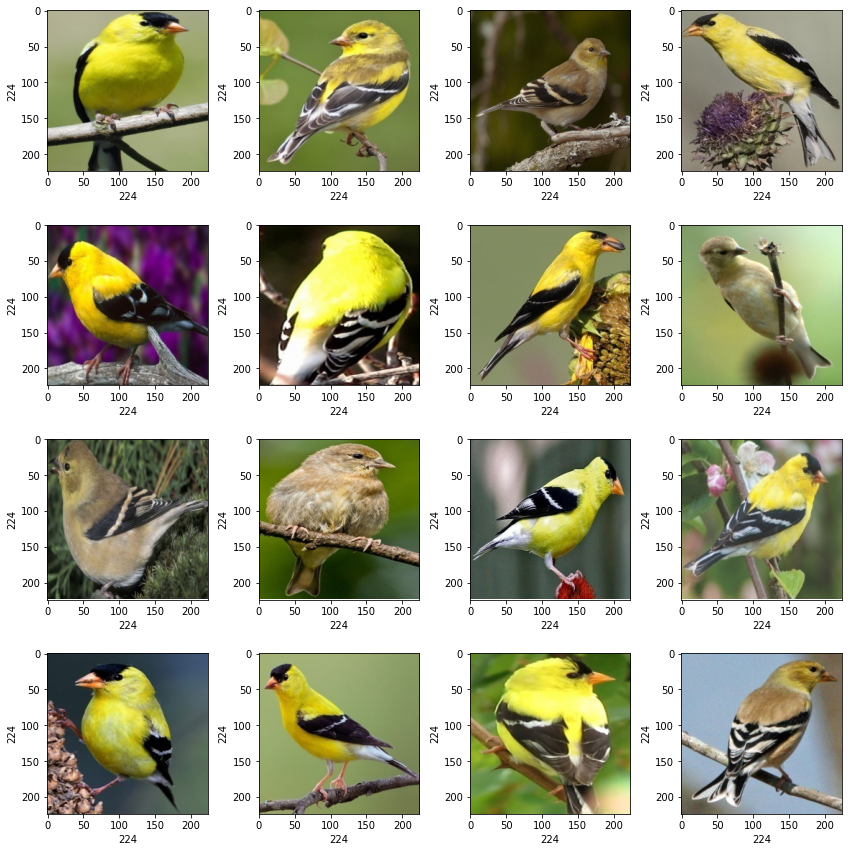

In [7]:
# plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

In [8]:
dir = "/content/drive/My Drive/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [9]:
# Read image and convert image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [10]:
# visualize the number of classes count - check class imbalance
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [11]:
# find number of classes to work on
num_classes = len(label_counts)
num_classes

6

In [12]:
# check size of the single image
image_list[0].shape

(224, 224, 3)

In [13]:
# check the shape of the image labels - equal to the total number of images on the drive
label_list = np.array(label_list)
label_list.shape

(811,)

In [14]:
# split the data into training and testing using train_test_split() of sklearn
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [15]:
# normalize the image dividing by 255. Reshape x_train and x_test
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) /255.0
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

In [38]:
from sklearn import preprocessing

In [43]:
# one hot encode 'y' data using label binarizer. Display sequence of the classes.
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

[0 1 2 3 4 5]


In [19]:
x_train,x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [23]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [26]:
import tensorflow as tf

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])

In [28]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 1.7714 - accuracy: 0.2857 - val_loss: 1.6793 - val_accuracy: 0.4692
Epoch 2/50
5/5 [==============================] - 10s 2s/step - loss: 1.6389 - accuracy: 0.4633 - val_loss: 1.5202 - val_accuracy: 0.5077
Epoch 3/50
5/5 [==============================] - 10s 2s/step - loss: 1.4854 - accuracy: 0.4151 - val_loss: 1.3572 - val_accuracy: 0.5615
Epoch 4/50
5/5 [==============================] - 11s 2s/step - loss: 1.2987 - accuracy: 0.5753 - val_loss: 1.2406 - val_accuracy: 0.5154
Epoch 5/50
5/5 [==============================] - 10s 2s/step - loss: 1.1545 - accuracy: 0.5965 - val_loss: 1.0972 - val_accuracy: 0.6538
Epoch 6/50
5/5 [==============================] - 11s 2s/step - loss: 0.9830 - accuracy: 0.6892 - val_loss: 1.0156 - val_accuracy: 0.6308
Epoch 7/50
5/5 [==============================] - 11s 2s/step - loss: 0.8697 - accuracy: 0.7162 - val_loss: 0.9011 - val_accuracy: 0.6462
Epoch 8/50
5/5 [==================

In [29]:
model.save("/content/drive/My Drive/bird_species.h5")

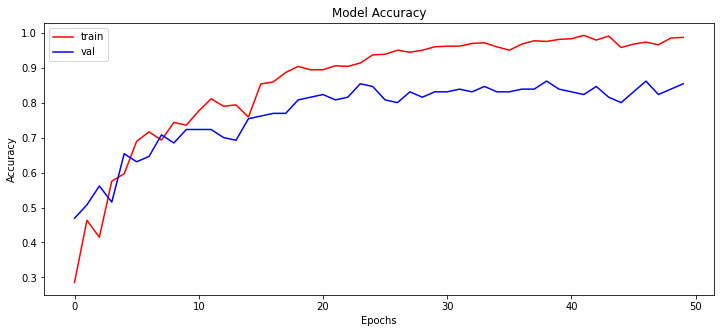

In [30]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

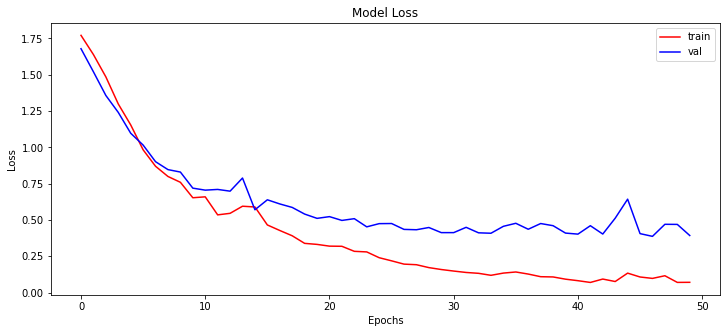

In [31]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [32]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 1s 198ms/step - loss: 0.5742 - accuracy: 0.8098
Test Accuracy: 80.98159432411194


In [33]:
# Storing predictions
y_pred = model.predict(x_test)

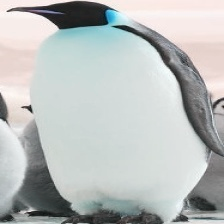

In [44]:
# Plotting image to compare
img = array_to_img(x_test[4])
img

In [47]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

[0 1 2 3 4 5]
Originally :  0
Predicted :  0
